# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [3]:
print(cities)

['seydi', 'barrow', 'longyearbyen', 'sitka', 'fairbanks', 'bethel', 'lumeje', 'rio grande', 'illoqqortoormiut', 'saleaula', 'hilo', 'korhogo', 'mataura', 'karlstad', 'port alfred', 'cape town', 'east london', 'biloela', 'thompson', 'jambusar', 'rikitea', 'lavrentiya', 'sioux lookout', 'cacoal', 'busselton', 'upington', 'ushuaia', 'liku', 'severo-kurilsk', 'pingdu', 'vaini', 'hudson bay', 'puerto palomas', 'zhigansk', 'bredasdorp', 'biak', 'codrington', 'kahului', 'srednekolymsk', 'puerto ayora', 'provideniya', 'mar del plata', 'havre-saint-pierre', 'taber', 'eyl', 'ancud', 'saint-philippe', 'albany', 'inhambane', 'belushya guba', 'tuktoyaktuk', 'bambanglipuro', 'geraldton', 'avarua', 'san quintin', 'batagay', 'port augusta', 'plettenberg bay', 'chokurdakh', 'hermanus', 'bacuit', 'miragoane', 'nikolskoye', 'hobart', 'abu dhabi', 'port elizabeth', 'farafangana', 'alofi', 'ussel', 'yellowknife', 'gambela', 'sao joao da barra', 'filadelfia', 'kapaa', 'sola', 'cidreira', 'zhenjiang', 'punta

In [55]:
df = pd.DataFrame(cities_20)
df = pd.DataFrame(cities)
df=df.rename(columns={0:'City'})

df['lat'] = ""
df['long'] = ""
df['temp'] = ""
df['humidity'] = ""
df['cloudiness'] = ""
df['windspeed'] = ""
df

,City,lat,long,temp,humidity,cloudiness,windspeed
0,seydi,,,,,,
1,barrow,,,,,,
2,longyearbyen,,,,,,
3,sitka,,,,,,
4,fairbanks,,,,,,
...,...,...,...,...,...,...,...
608,waingapu,,,,,,
609,halalo,,,,,,
610,vicuna,,,,,,
611,sinop,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [58]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
api_key = weather_api_key

query_url = f"{url}appid={api_key}&units={units}&q="

#city=cities
city=cities_20
count = 1

In [59]:
for i, row in df.iterrows():
    city=row[0]
    response = requests.get(query_url + city).json()
    
    try:
        lat = response['coord']['lat']
        long = response['coord']['lon']
        temp = response['main']['temp']
        humidity = response['main']['humidity']
        cloudiness = response['clouds']['all']
        windspeed = response['wind']['speed']
           
        df.loc[i, "lat"] = lat
        df.loc[i, "long"] = long
        df.loc[i, "temp"] = temp
        df.loc[i, "humidity"] = humidity
        df.loc[i, "cloudiness"] = cloudiness
        df.loc[i, "windspeed"] = windspeed
        print(f"Processing Record {count} | {city}")
        count += 1
    except:
        print(f"City not found. Skipping")
        count += 1

df.head(20)

df.to_csv("cities_data_.csv", index = False)
df.head()
df.dtypes
df[['lat','long', 'temp', 'humidity', 'cloudiness', 'windspeed']]=df[['lat','long', 'temp', 'humidity', 'cloudiness', 'windspeed']].apply(pd.to_numeric)
df.dtypes


Processing Record 1 | seydi
Processing Record 2 | barrow
Processing Record 3 | longyearbyen
Processing Record 4 | sitka
Processing Record 5 | fairbanks
Processing Record 6 | bethel
Processing Record 7 | lumeje
Processing Record 8 | rio grande
City not found. Skipping
City not found. Skipping
Processing Record 11 | hilo
Processing Record 12 | korhogo
Processing Record 13 | mataura
Processing Record 14 | karlstad
Processing Record 15 | port alfred
Processing Record 16 | cape town
Processing Record 17 | east london
Processing Record 18 | biloela
Processing Record 19 | thompson
Processing Record 20 | jambusar
Processing Record 21 | rikitea
Processing Record 22 | lavrentiya
Processing Record 23 | sioux lookout
Processing Record 24 | cacoal
Processing Record 25 | busselton
Processing Record 26 | upington
Processing Record 27 | ushuaia
Processing Record 28 | liku
Processing Record 29 | severo-kurilsk
Processing Record 30 | pingdu
Processing Record 31 | vaini
Processing Record 32 | hudson bay


Processing Record 253 | barotac viejo
Processing Record 254 | herat
Processing Record 255 | carnarvon
Processing Record 256 | olinda
Processing Record 257 | makat
Processing Record 258 | sidi ali
Processing Record 259 | aklavik
Processing Record 260 | leningradskiy
Processing Record 261 | seoul
Processing Record 262 | west bay
City not found. Skipping
Processing Record 264 | namatanai
Processing Record 265 | brewster
Processing Record 266 | maragogi
Processing Record 267 | celestun
Processing Record 268 | dikson
Processing Record 269 | beringovskiy
Processing Record 270 | touros
Processing Record 271 | takestan
Processing Record 272 | taga
Processing Record 273 | paamiut
Processing Record 274 | axim
Processing Record 275 | kalakamati
Processing Record 276 | aykhal
Processing Record 277 | port moresby
Processing Record 278 | tautira
Processing Record 279 | ixtapa
Processing Record 280 | tawau
City not found. Skipping
Processing Record 282 | ponta delgada
Processing Record 283 | qaanaaq


Processing Record 507 | ocos
Processing Record 508 | farah
Processing Record 509 | erenhot
Processing Record 510 | ketchikan
Processing Record 511 | acapulco
Processing Record 512 | sorland
Processing Record 513 | mulege
Processing Record 514 | sao domingos
Processing Record 515 | whitianga
Processing Record 516 | klaksvik
Processing Record 517 | oshnaviyeh
Processing Record 518 | lakes entrance
Processing Record 519 | sao sepe
Processing Record 520 | buckeye
Processing Record 521 | deputatskiy
Processing Record 522 | komsomolskiy
Processing Record 523 | hargeysa
Processing Record 524 | santa isabel do rio negro
Processing Record 525 | lexington
Processing Record 526 | dagua
Processing Record 527 | terenos
City not found. Skipping
Processing Record 529 | aleksandrov gay
City not found. Skipping
Processing Record 531 | alekseyevka
Processing Record 532 | sharjah
Processing Record 533 | tura
Processing Record 534 | lake mary
Processing Record 535 | miandrivazo
Processing Record 536 | akd

City           object
lat           float64
long          float64
temp          float64
humidity      float64
cloudiness    float64
windspeed     float64
dtype: object

In [61]:
df
df.to_csv("cities_data_.csv", index = False)
df.dropna(inplace=True)
df

,City,lat,long,temp,humidity,cloudiness,windspeed
0,seydi,39.4816,62.9137,69.48,19.0,0.0,16.91
1,barrow,71.2906,-156.7887,17.60,79.0,90.0,12.66
2,longyearbyen,78.2186,15.6401,28.40,74.0,75.0,16.11
3,sitka,57.0531,-135.3300,44.60,87.0,90.0,12.66
4,fairbanks,64.8378,-147.7164,61.50,23.0,40.0,3.60
...,...,...,...,...,...,...,...
607,jining,35.4050,116.5814,67.28,85.0,100.0,8.75
608,waingapu,-9.6567,120.2641,81.10,75.0,94.0,15.01
610,vicuna,-30.0319,-70.7081,63.00,37.0,5.0,1.01
611,sinop,41.7711,34.8709,61.68,57.0,6.0,6.87


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [63]:
df.loc[df['humidity']>=100]

,City,lat,long,temp,humidity,cloudiness,windspeed
41,mar del plata,-38.0023,-57.5575,56.46,100.0,100.0,3.69
45,ancud,-41.8697,-73.8203,45.77,100.0,90.0,4.61
203,naze,28.3667,129.4833,73.40,100.0,75.0,3.44
204,carahue,-38.7000,-73.1667,48.20,100.0,75.0,1.36
215,arraial do cabo,-22.9661,-42.0278,66.20,100.0,75.0,1.14
271,taga,46.9500,24.0500,54.81,100.0,90.0,3.44
419,dzialdowo,53.2396,20.1700,42.80,100.0,0.0,0.72
565,bereda,43.2686,-7.5406,43.21,100.0,67.0,1.99
599,martapura,-3.4167,114.8500,77.00,100.0,20.0,1.70


In [71]:
#  Get the indices of cities that have humidity over 100%.
#df.drop(labels=[41, 45, 203, 204, 215, 271, 419, 565, 599], axis=0, inplace=True)


,City,lat,long,temp,humidity,cloudiness,windspeed
44,eyl,7.9803,49.8164,82.27,73.0,100.0,21.92
46,saint-philippe,-21.3585,55.7679,70.56,78.0,20.0,5.75
47,albany,42.6001,-73.9662,62.24,34.0,40.0,5.75
48,inhambane,-23.8650,35.3833,66.78,77.0,0.0,5.26
50,tuktoyaktuk,69.4541,-133.0374,23.00,74.0,75.0,18.41
...,...,...,...,...,...,...,...
607,jining,35.4050,116.5814,67.28,85.0,100.0,8.75
608,waingapu,-9.6567,120.2641,81.10,75.0,94.0,15.01
610,vicuna,-30.0319,-70.7081,63.00,37.0,5.0,1.01
611,sinop,41.7711,34.8709,61.68,57.0,6.0,6.87


In [86]:
#df.reset_index(inplace=True)
#df.iloc[40:]

In [114]:
df

,City,lat,long,temp,humidity,cloudiness,windspeed
0,seydi,39.4816,62.9137,69.48,19.0,0.0,16.91
1,barrow,71.2906,-156.7887,17.60,79.0,90.0,12.66
2,longyearbyen,78.2186,15.6401,28.40,74.0,75.0,16.11
3,sitka,57.0531,-135.3300,44.60,87.0,90.0,12.66
4,fairbanks,64.8378,-147.7164,61.50,23.0,40.0,3.60
...,...,...,...,...,...,...,...
554,jining,35.4050,116.5814,67.28,85.0,100.0,8.75
555,waingapu,-9.6567,120.2641,81.10,75.0,94.0,15.01
556,vicuna,-30.0319,-70.7081,63.00,37.0,5.0,1.01
557,sinop,41.7711,34.8709,61.68,57.0,6.0,6.87


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

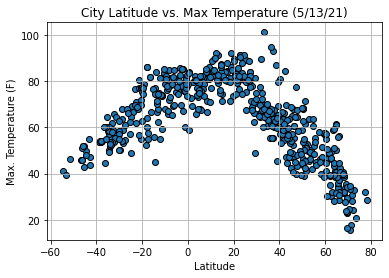

In [143]:
latitude=df.iloc[:, 1]
temperature=df.iloc[:, 3]


# Plot
plt.scatter(latitude, temperature, edgecolors='black')
plt.title('City Latitude vs. Max Temperature (5/13/21)')
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature (F)')
plt.grid()
plt.savefig("scatter_lat_temp.png")
plt.show()


## Latitude vs. Humidity Plot

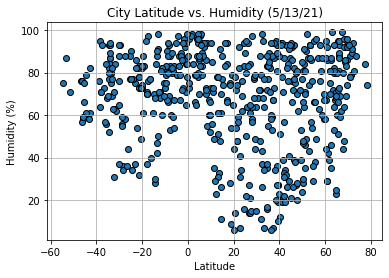

In [144]:
humidity=df.iloc[:, 4]
plt.scatter(latitude,humidity, edgecolors="black")
plt.title('City Latitude vs. Humidity (5/13/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("scatter_lat_humid.png")
plt.show()

## Latitude vs. Cloudiness Plot

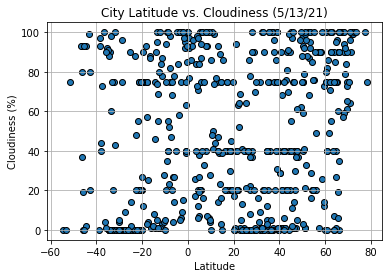

In [145]:
cloud = df.iloc[:, 5]
plt.scatter(latitude,cloud, edgecolors="black")
plt.title('City Latitude vs. Cloudiness (5/13/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("scatter_lat_cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

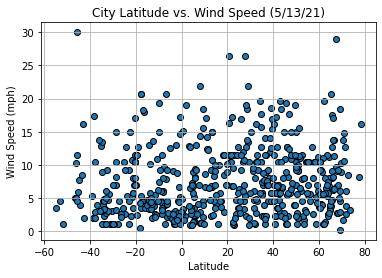

In [146]:
wind=df.iloc[:, 6]
plt.scatter(latitude,wind, edgecolors="black")
plt.title('City Latitude vs. Wind Speed (5/13/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("scatter_lat_wind.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.725735579458894


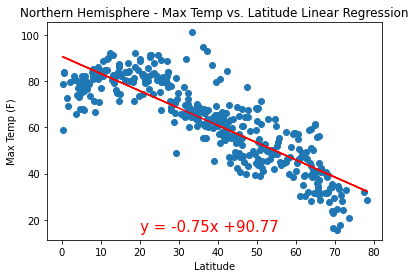

In [147]:
northern_hemisphere = df.loc[df['lat']>0]
northern_hemisphere

n_lat=northern_hemisphere.iloc[:, 1]
n_temp=northern_hemisphere.iloc[:, 3]

(slope, intercept, rvalue, pvalue, stderr)=linregress(n_lat, n_temp)
regress_values = n_lat * slope + intercept

plt.scatter(n_lat, n_temp)
plt.plot(n_lat, regress_values, "r-")

print(f"The r-value is: {rvalue**2}")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("lr_northlat_temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6555055644286548


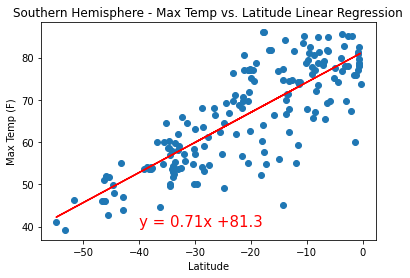

In [148]:
southern_hemisphere = df.loc[df['lat']<0]
southern_hemisphere

s_lat=southern_hemisphere.iloc[:, 1]
s_temp=southern_hemisphere.iloc[:, 3]

(slope, intercept, rvalue, pvalue, stderr)=linregress(s_lat, s_temp)
regress_values = s_lat * slope + intercept
plt.scatter(s_lat,s_temp)
plt.plot(s_lat, regress_values, "r-")

print(f"The r-value is: {rvalue**2}")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("lr_southlat_temp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000435795586781973


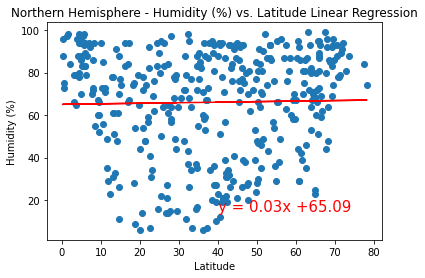

In [149]:
n_lat=northern_hemisphere.iloc[:, 1]
n_humidity=northern_hemisphere.iloc[:, 4]

(slope, intercept, rvalue, pvalue, stderr)=linregress(n_lat, n_humidity)
regress_values = n_lat * slope + intercept
plt.scatter(n_lat, n_humidity)
plt.plot(n_lat, regress_values, "r-")

print(f"The r-value is: {rvalue**2}")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.savefig("lr_northlat_humid.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.034656970466731045


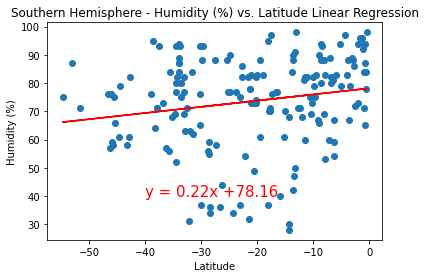

In [150]:
s_lat=southern_hemisphere.iloc[:, 1]
s_humidity=southern_hemisphere.iloc[:, 4]

(slope, intercept, rvalue, pvalue, stderr)=linregress(s_lat, s_humidity)
regress_values = s_lat * slope + intercept
plt.scatter(s_lat,s_humidity)
plt.plot(s_lat, regress_values, "r-")

print(f"The r-value is: {rvalue**2}")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.savefig("lr_southlat_humid.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.047703400972176346


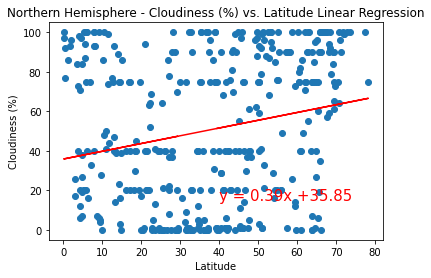

In [151]:
n_lat=northern_hemisphere.iloc[:, 1]
n_cloudiness=northern_hemisphere.iloc[:, 5]

(slope, intercept, rvalue, pvalue, stderr)=linregress(n_lat, n_cloudiness)
regress_values = n_lat * slope + intercept
plt.scatter(n_lat, n_cloudiness)
plt.plot(n_lat, regress_values, "r-")

print(f"The r-value is: {rvalue**2}")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.savefig("lr_northlat_cloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.042618686468406455


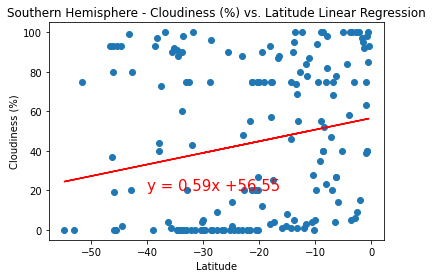

In [152]:
s_lat=southern_hemisphere.iloc[:, 1]
s_cloudiness=southern_hemisphere.iloc[:, 5]

(slope, intercept, rvalue, pvalue, stderr)=linregress(s_lat, s_cloudiness)
regress_values = s_lat * slope + intercept
plt.scatter(s_lat,s_cloudiness)
plt.plot(s_lat, regress_values, "r-")

print(f"The r-value is: {rvalue**2}")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.savefig("lr_southlat_cloud.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0006134615472603926


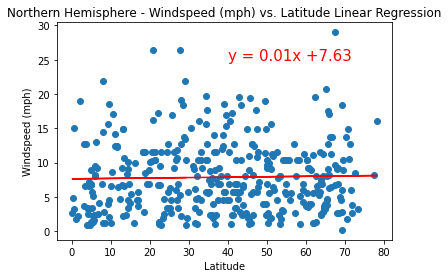

In [153]:
n_lat=northern_hemisphere.iloc[:, 1]
n_windspeed=northern_hemisphere.iloc[:, 6]

(slope, intercept, rvalue, pvalue, stderr)=linregress(n_lat, n_windspeed)
regress_values = n_lat * slope + intercept
plt.scatter(n_lat, n_windspeed)
plt.plot(n_lat, regress_values, "r-")

print(f"The r-value is: {rvalue**2}")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.title("Northern Hemisphere - Windspeed (mph) vs. Latitude Linear Regression")
plt.savefig("lr_northlat_wind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 6.963220688141665e-05


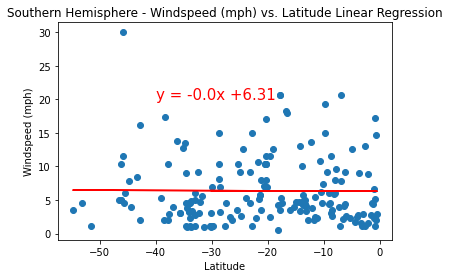

In [154]:
s_lat=southern_hemisphere.iloc[:, 1]
s_windspeed=southern_hemisphere.iloc[:, 6]

(slope, intercept, rvalue, pvalue, stderr)=linregress(s_lat, s_windspeed)
regress_values = s_lat * slope + intercept
plt.scatter(s_lat,s_windspeed)
plt.plot(s_lat, regress_values, "r-")

print(f"The r-value is: {rvalue**2}")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.title("Southern Hemisphere - Windspeed (mph) vs. Latitude Linear Regression")
plt.savefig("lr_southlat_wind.png")
plt.show()